<a href="https://colab.research.google.com/github/krislars/compuphys/blob/main/Pendulum_Poincare_section.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math as math
from matplotlib import pyplot as plt

In [ ]:
q=0.5
L=9.8
g=9.8
g_over_L=g/L
OmegaD=2./3.
FD=1.2  # HW: 0.5, 1.2;  Try: 1.0, 1.075(p2), 1.081(p4);  explore: 1.4->1.5
dt=0.04
steps=500000

In [ ]:
# Runge Kutta 2nd order, with clipping
theta = np.zeros(steps)
omega = np.zeros(steps)
t = np.zeros(steps)
theta[0] = 0.5 # radians
omega[0] = 0. # radians/second
for j in range(steps-1):
    theta_half = theta[j] + omega[j]*dt/2.
    omega_half = omega[j] + (-g_over_L*np.sin(theta[j]) - q*omega[j] + FD*np.sin(OmegaD*t[j]))*dt/2.
    t_half = t[j] + dt/2.
    theta[j+1] = theta[j] + omega_half*dt
    omega[j+1] = omega[j] + (-g_over_L*np.sin(theta_half) - q*omega_half + FD*np.sin(OmegaD*t_half))*dt
    t[j+1] = t[j] + dt
    if (theta[j+1] <= -np.pi):
        theta[j+1] = theta[j+1] + 2.*np.pi
    if (theta[j+1] >= np.pi):
        theta[j+1] = theta[j+1] - 2.*np.pi

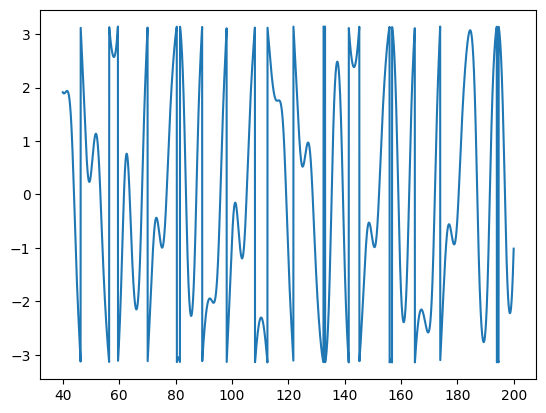

In [ ]:
plt.plot(t[1000:5000],theta[1000:5000])

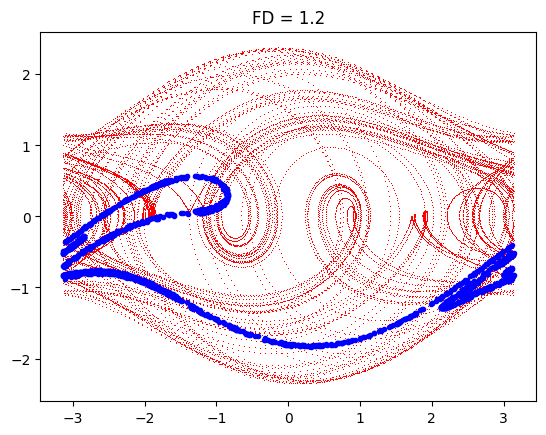

In [ ]:
inphase = np.fabs(np.remainder(t,2*math.pi/OmegaD)) < dt
plt.plot(theta[1000:20000],omega[1000:20000],'r,')
plt.plot(theta[inphase][5:],omega[inphase][5:],'b.')
plt.title('FD = '+str(FD))
plt.show()